In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('../datasets/Crop_Recommendation.csv')

Data info

In [3]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [4]:
df.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [5]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [6]:
df.size

17600

In [7]:
df.shape

(2200, 8)

In [8]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [9]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [10]:
df.dtypes

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object

In [11]:
df['Crop'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: Crop, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.info

<bound method DataFrame.info of       Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        Rainfall    Crop  
0     202.935536    Rice  
1     226.655

In [14]:
df.isnull().sum().any()

False

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
#renaming label class
df.rename(columns={'Crop': 'label'}, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Exploratory Data Analysis

In [19]:
#correlation
corr_matrix=df.drop('label', axis=1).corr()
corr_matrix

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

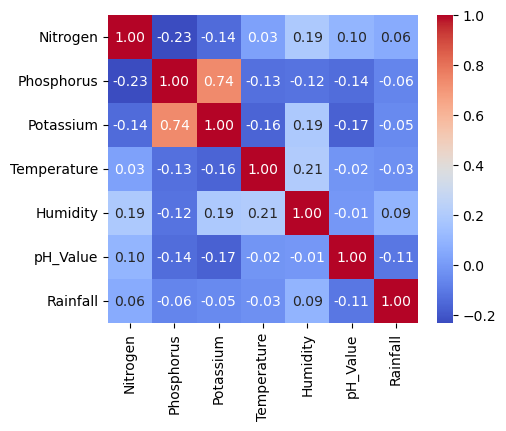

In [20]:
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

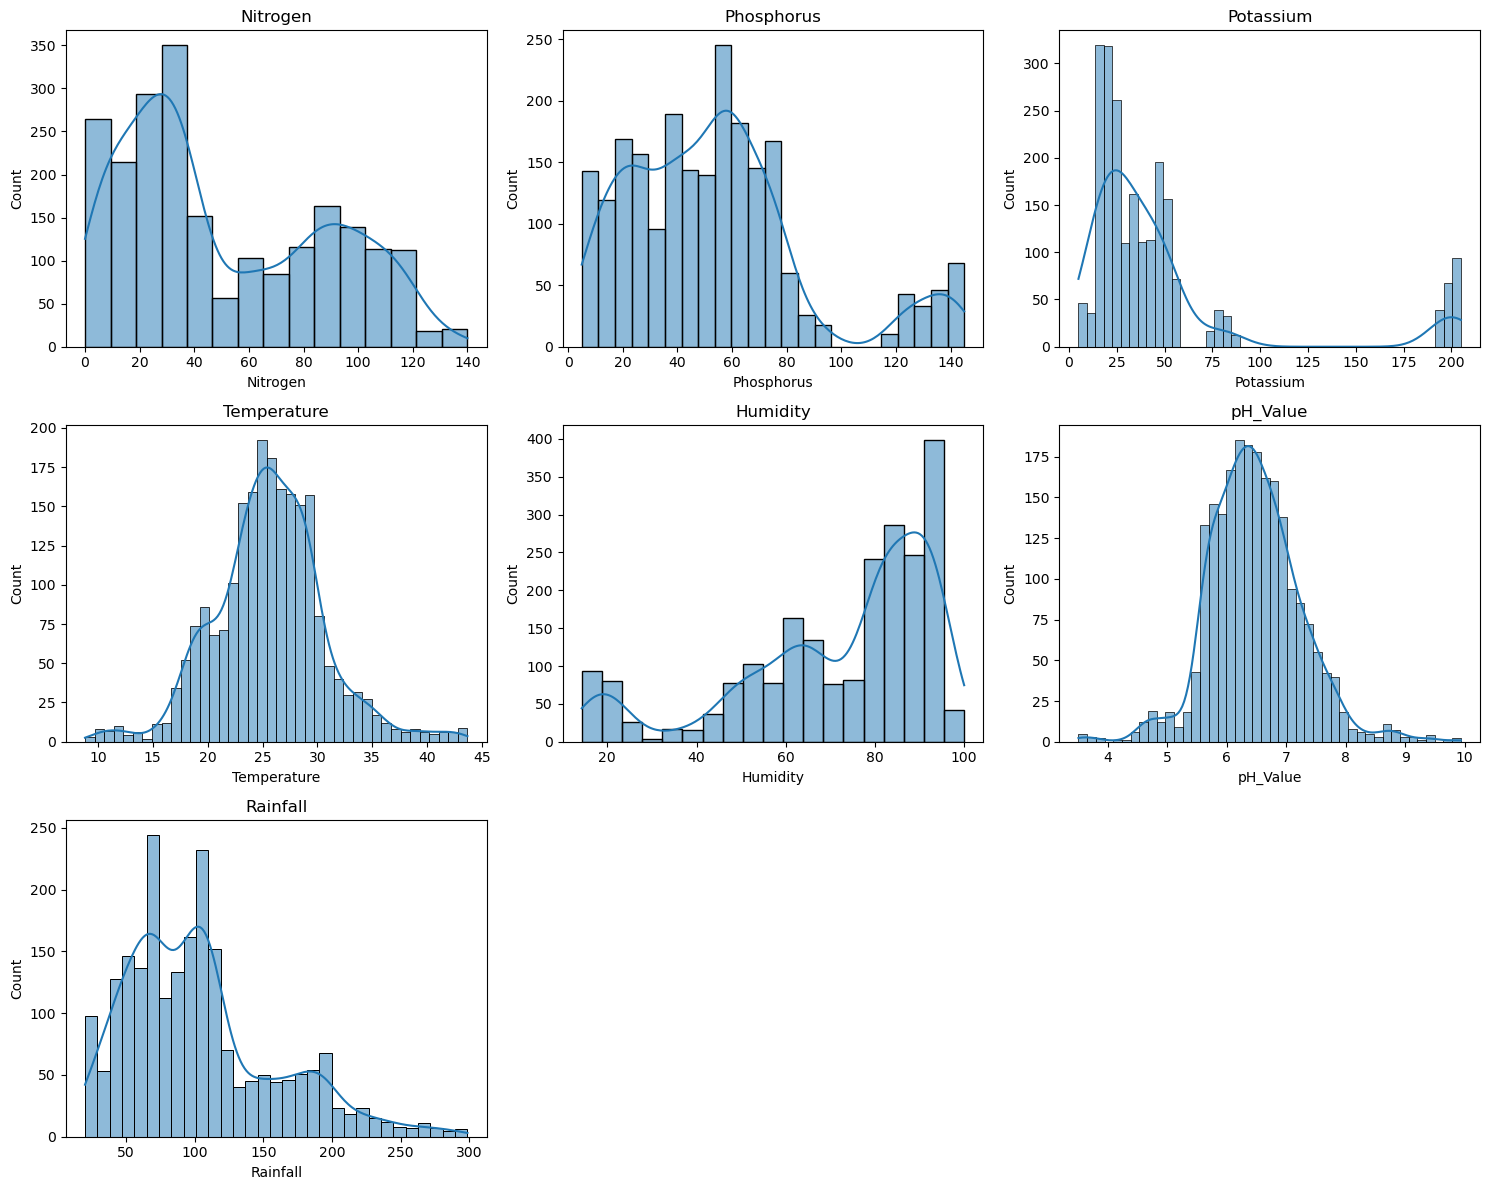

In [21]:
#Feature Distributions

cols = df.columns.drop('label')
n = len(cols)

fig, axes = plt.subplots((n + 2) // 3, 3, figsize=(15, 4 * ((n + 2) // 3)))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

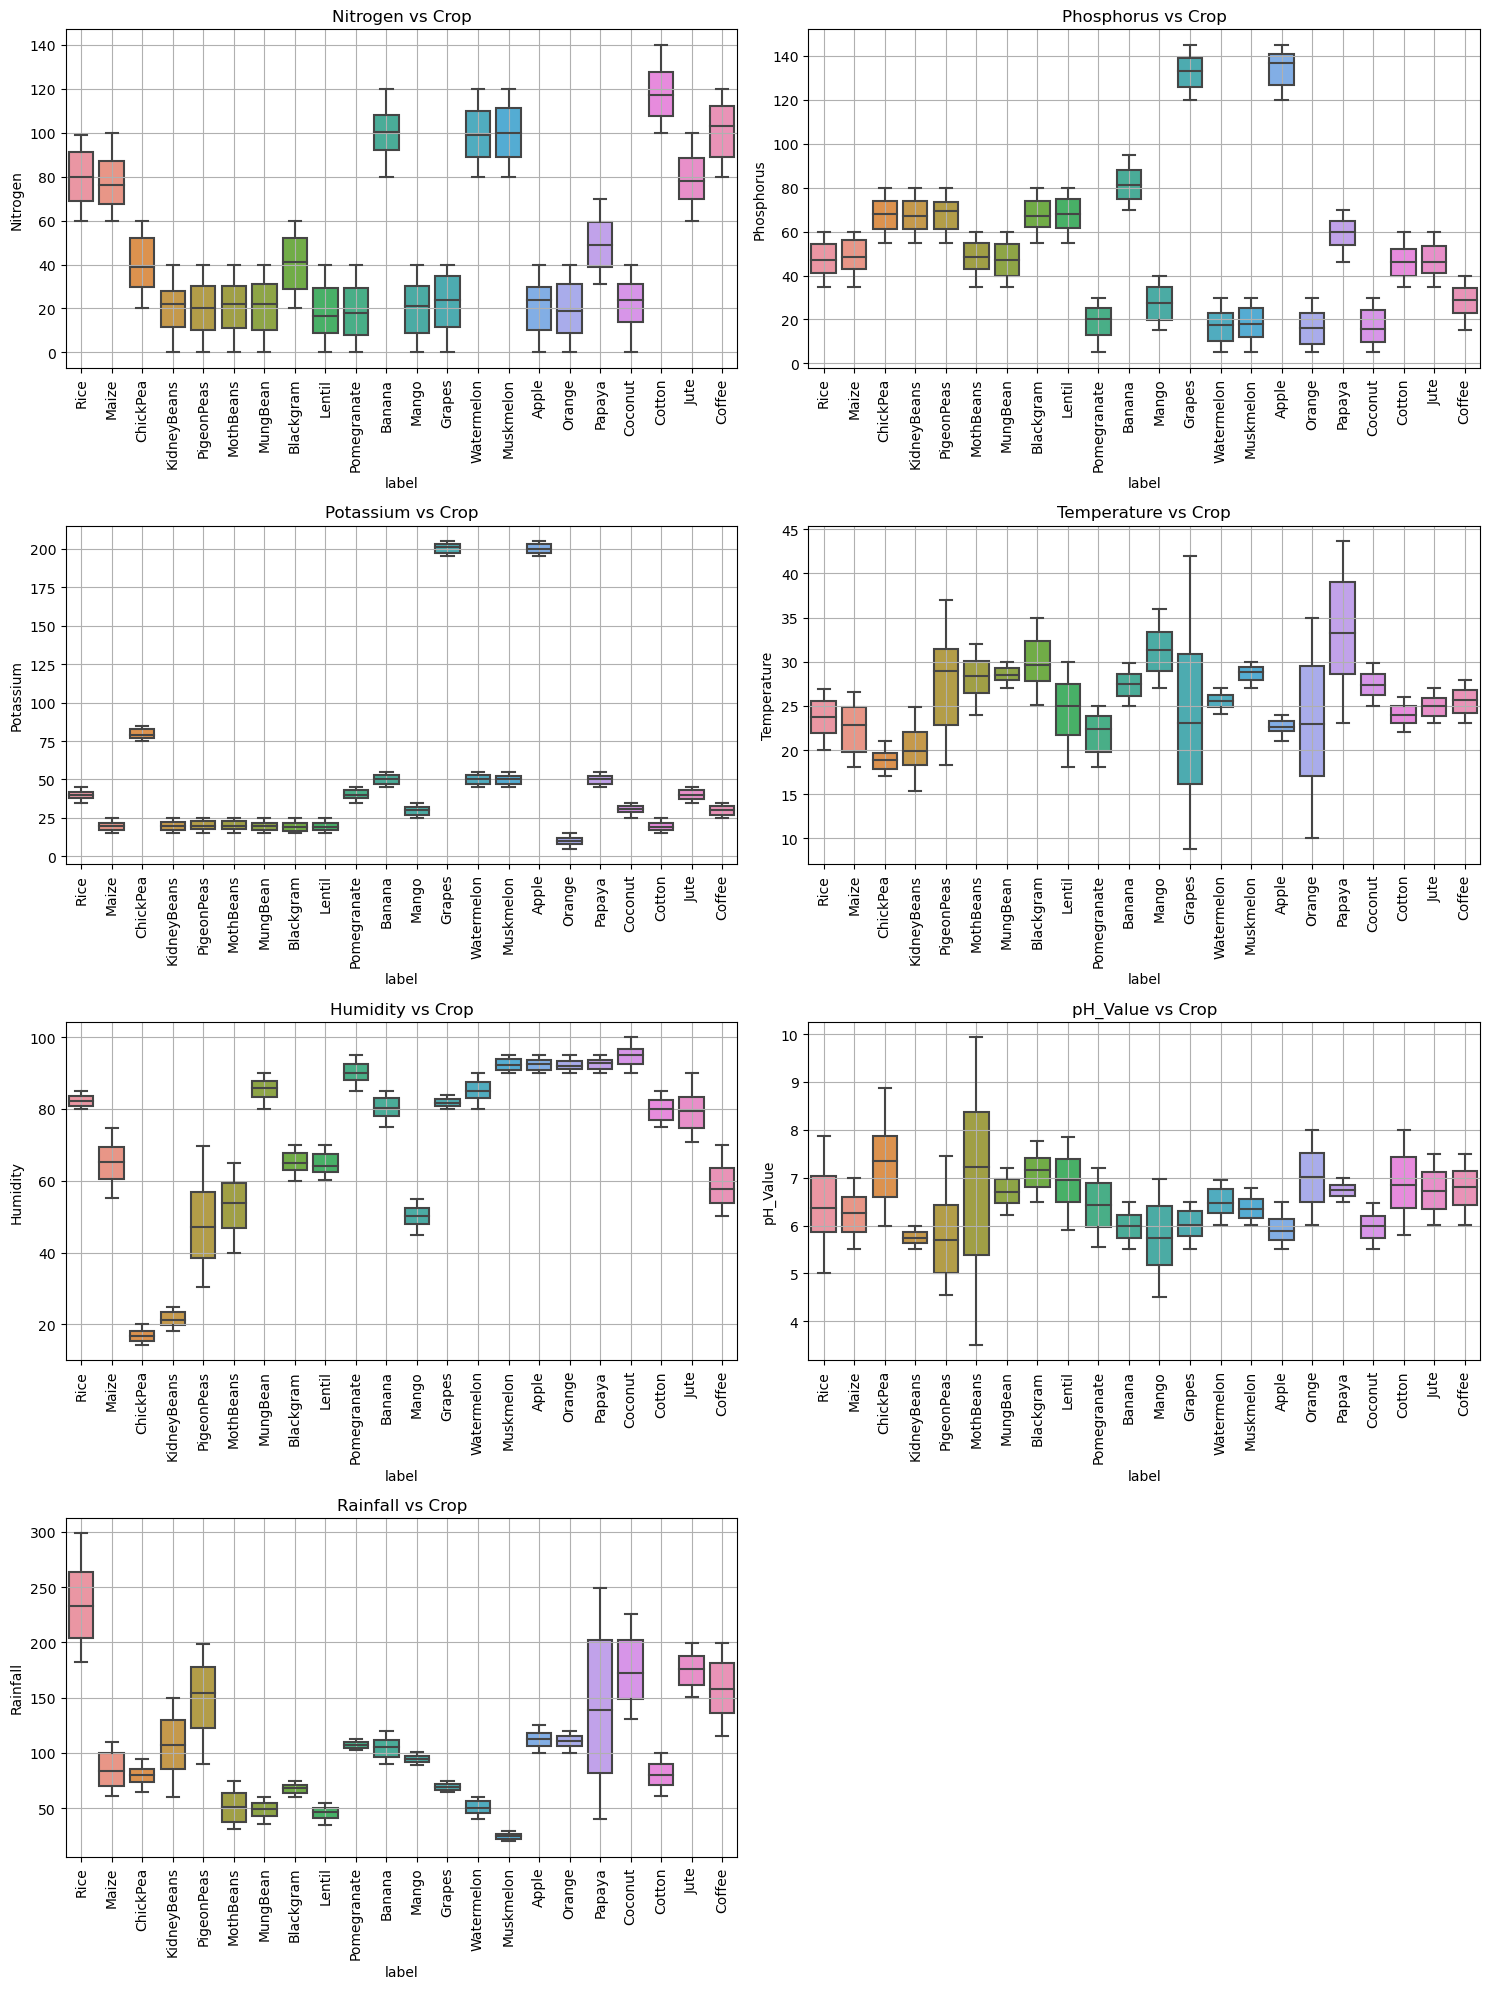

In [33]:
#plotting effect of input variable with output variable

cols = df.columns.drop('label')
n = len(cols)

fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(15, 5 * ((n + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x='label', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Crop')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(True)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()

In [30]:
#Min, max and average values of each feature
df.groupby('label').agg(['min', 'mean', 'max'])

Nitrogen              Phosphorus              Potassium          \
                 min    mean  max        min    mean  max       min    mean   
label                                                                         
Apple              0   20.80   40        120  134.22  145       195  199.89   
Banana            80  100.23  120         70   82.01   95        45   50.05   
Blackgram         20   40.02   60         55   67.47   80        15   19.24   
ChickPea          20   40.09   60         55   67.79   80        75   79.92   
Coconut            0   21.98   40          5   16.93   30        25   30.59   
Coffee            80  101.20  120         15   28.74   40        25   29.94   
Cotton           100  117.77  140         35   46.24   60        15   19.56   
Grapes             0   23.18   40        120  132.53  145       195  200.11   
Jute              60   78.40  100         35   46.86   60        35   39.99   
KidneyBeans        0   20.75   40         55   67.54   80        15   20.05   
Lentil             0   18.77   40         55   68.36   80        15   19.41   
Maize             60   77.76  100         35   48.44   60        15   19.79   
Mango              0   20.07   40         15   27.18   40        25   29.92   
MothBeans          0   21.44   40         35   48.01   60        15   20.23   
MungBean           0   20.99   40         35   47.28   60        15   19.87   
Muskmelon         80  100.32  120          5   17.72   30        45   50.08   
Orange             0   19.58   40          5   16.55   30         5   10.01   
Papaya            31   49.88   70         46   59.05   70        45   50.04   
PigeonPeas         0   20.73   40         55   67.73   80        15   20.29   
Pomegranate        0   18.87   40          5   18.75   30        35   40.21   
Rice              60   79.89   99         35   47.58   60        35   39.87   
Watermelon        80   99.42  120          5   17.00   30        45   50.22   

                 Temperature  ...              Humidity                        \
             max         min  ...        max        min       mean        max   
label                         ...                                               
Apple        205   21.036527  ...  23.996862  90.025751  92.333383  94.920481   
Banana        55   25.010185  ...  29.908885  75.031933  80.358123  84.978492   
Blackgram     25   25.097374  ...  34.946616  60.065349  65.118426  69.961000   
ChickPea      85   17.024985  ...  20.995022  14.258040  16.860439  19.969789   
Coconut       35   25.008724  ...  29.869083  90.017345  94.844272  99.981876   
Coffee        35   23.059519  ...  27.923744  50.045570  58.869846  69.948073   
Cotton        25   22.000851  ...  25.992374  75.005393  79.843474  84.876690   
Grapes       205    8.825675  ...  41.948657  80.016394  81.875228  83.983517   
Jute          45   23.094338  ...  26.985822  70.882596  79.639864  89.891065   
KidneyBeans   25   15.330426  ...  24.923601  18.092240  21.605357  24.969699   
Lentil        25   18.064861  ...  29.944139  60.091166  64.804785  69.923759   
Maize         25   18.041855  ...  26.549864  55.282204  65.092249  74.829137   
Mango         35   27.003155  ...  35.990097  45.022364  50.156573  54.964053   
MothBeans     25   24.018254  ...  31.999286  40.009334  53.160418  64.955854   
MungBean      25   27.014704  ...  29.914544  80.034996  85.499975  89.996156   
Muskmelon     55   27.024151  ...  29.943492  90.015064  92.342802  94.962187   
Orange        15   10.010813  ...  34.906653  90.006217  92.170209  94.964199   
Papaya        55   23.012402  ...  43.675493  90.038631  92.403388  94.944821   
PigeonPeas    25   18.319104  ...  36.977944  30.400468  48.061633  69.691413   
Pomegranate   45   18.071330  ...  24.962732  85.129122  90.125504  94.998975   
Rice          45   20.045414  ...  26.929951  80.122675  82.272822  84.969072   
Watermelon    55   24.043558  ...  26.986037  80.026213  85.160375  89.984052   

          

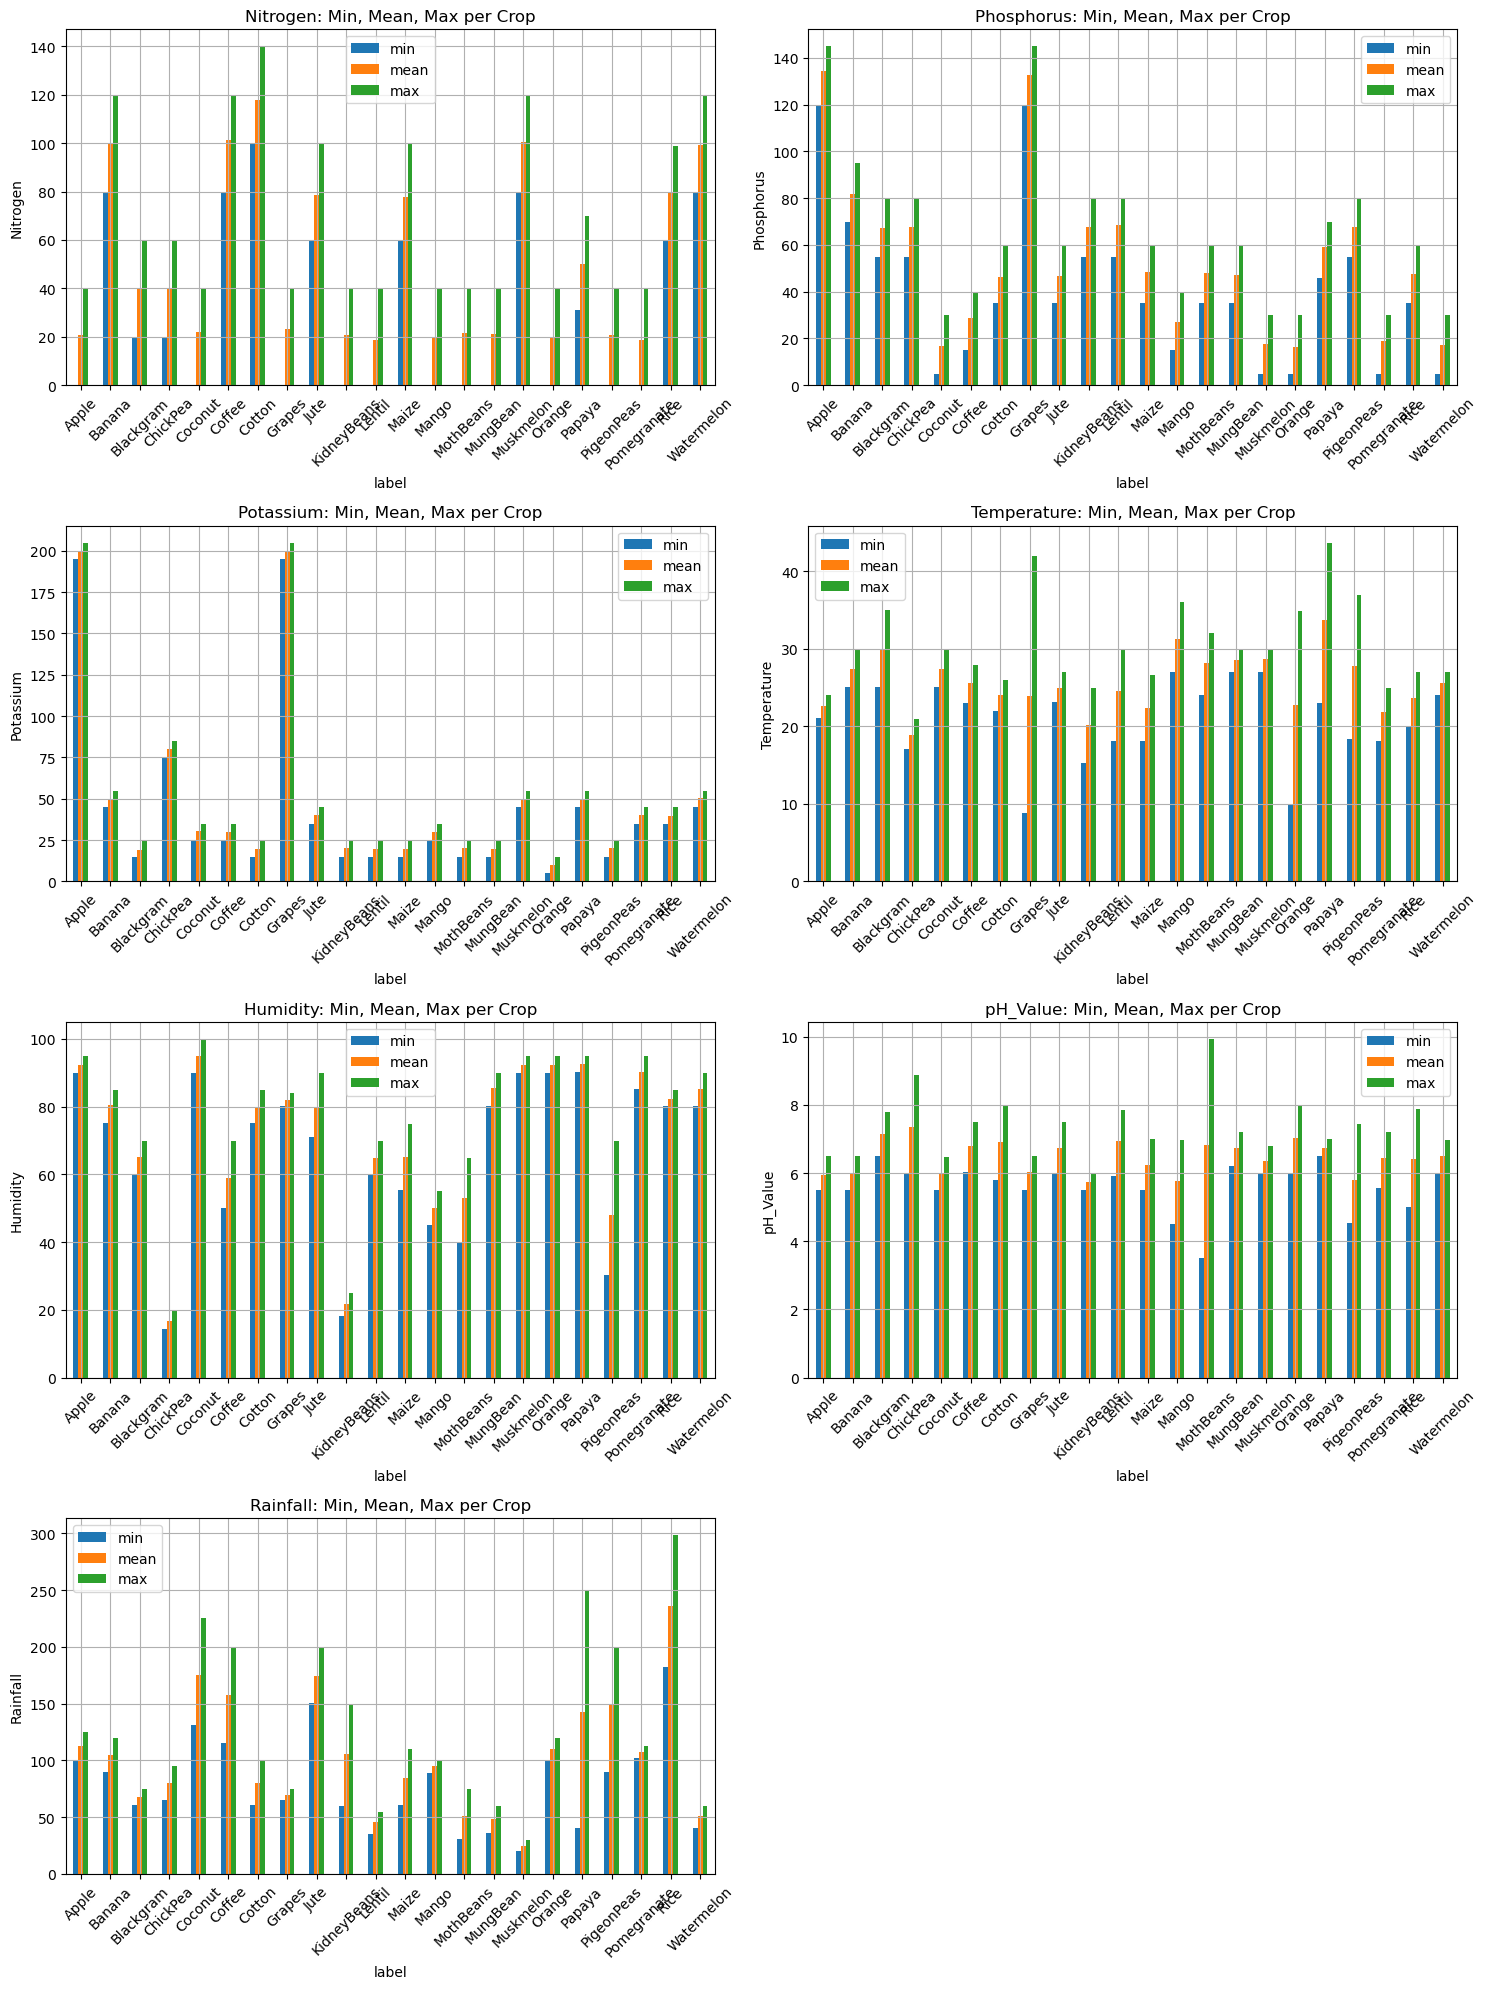

In [32]:
#Plotting the same
summary = df.groupby('label').agg(['min', 'mean', 'max'])
features = df.columns.drop('label')

n = len(features)
fig, axes = plt.subplots((n + 1) // 2, 2, figsize=(15, 5 * ((n + 1) // 2)))
axes = axes.flatten()

for i, col in enumerate(features):
    summary[col].plot(kind='bar', ax=axes[i], title=f'{col}: Min, Mean, Max per Crop')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)

# Hide unused axes
for ax in axes[i+1:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

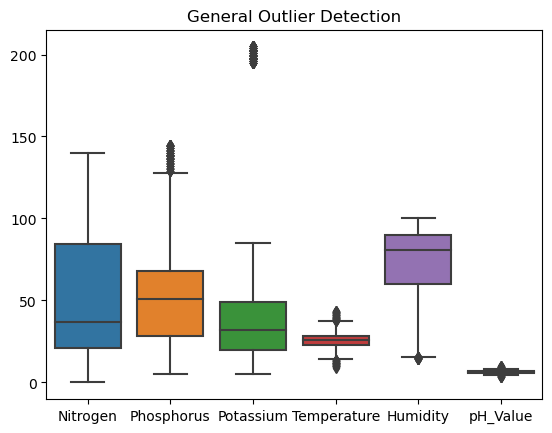

In [25]:
sns.boxplot(data=df[["Nitrogen","Phosphorus","Potassium","Temperature","Humidity","pH_Value"]])
plt.title("General Outlier Detection")
plt.show()

In [36]:
df.drop('label', axis=1).agg(['min', 'mean', 'max']).T

,min,mean,max
Nitrogen,0.000000,50.551818,140.000000
Phosphorus,5.000000,53.362727,145.000000
Potassium,5.000000,48.149091,205.000000
Temperature,8.825675,25.616244,43.675493
Humidity,14.258040,71.481779,99.981876
pH_Value,3.504752,6.469480,9.935091
Rainfall,20.211267,103.463655,298.560117
